# Cumulative volume time derivative ($\frac{\partial \mathcal{V}}{\partial t}$) in S Space

In [12]:
from dask.distributed import Client

client = Client("tcp://10.32.2.132:39185")
client

Client Scheduler: tcp://10.32.2.132:39185 Dashboard: /user/0000-0002-8176-9465/proxy/8787/status,Cluster Workers: 30 Cores: 60 Memory: 345.00 GB


In [13]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
from xhistogram.xarray import histogram
import xmitgcm
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline

In [14]:
ds = xr.open_zarr(gcsfs.GCSFileSystem(requester_pays=True).get_mapper('pangeo-ecco-eccov4r3/eccov4r3'), consolidated=True)

In [15]:
dt = ds.time_snp[1:].load()
dt.values = [float(t)/10**9 for t in np.diff(ds.time_snp)]
#rename time (and iter axis)
dt = dt.rename({'time_snp':'time'})
# time axis of dt should be the same as of the monthly averages
dt.time.values = ds.time[1:-1].values
#dt.time.values = ds.time.values[1:-1] 
#add nans to dt to change size form 286 to 288

ds = ds.assign_coords(dt=dt)
ds.dt.attrs = {'units': 's','standard_name': 'dt','coordinate': 'time','long_name': 'time span between snapshots'}

#should I just add nans as first and last value?

In [16]:
ds_ll = faces_dataset_to_latlon(ds)
ds_ll_drop = ds_ll.drop(['i', 'j', 'i_g', 'j_g']) #, 'k', 'k_u', 'k_l', 'k_p1'])

In [17]:
# a trick to make things work a bit faster
coords = ds_ll_drop.coords.to_dataset().reset_coords().roll(i=100, i_g=100)
ds = ds_ll_drop.reset_coords(drop=True).roll(i=100, i_g=100)
ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  This is separate from the ipykernel package so we can avoid doing imports until


<xarray.Dataset>
Dimensions:    (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Dimensions without coordinates: i, i_g, j, j_g
Data variables:
    ADVr_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ETAN       (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    ETAN_snp   (time_snp, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    GEOFLX     (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    SALT       (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    SALT_snp   (time_snp, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    SFLUX      (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    TFLUX      (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    THETA      (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    THETA_snp  (time_snp, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    WVELMASS   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    oceFWflx   (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceQsw     (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceSPtnd   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    ADVx_TH    (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    DFxE_SLT   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFyE_SLT   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    DFxE_TH    (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFyE_TH    (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    UVELMASS   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    VVELMASS   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>

In [18]:
lower_lat = 35 #9
upper_lat = 75 #44
left_lon = 75 #21
right_lon = 167 #120

In [19]:
#set the boundaries
lat_range = dict(j=slice(lower_lat, upper_lat))
lon_range = dict(i=slice(left_lon, right_lon))

In [20]:
# define bins
salt_bins = np.arange(32, 38.1, 0.1)
salt_bins

array([32. , 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33. ,
       33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1,
       34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2,
       35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36.3,
       36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37. , 37.1, 37.2, 37.3, 37.4,
       37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1])

In [23]:
# salt distribution in WG region
vol = (coords.hFacC * coords.rA * coords.drF).isel(**lat_range, **lon_range)

salt_dist = histogram(ds.SALT.isel(**lat_range, **lon_range), bins=[salt_bins],
                       weights=vol, dim=['i', 'j', 'k'])
salt_dist.load()

<xarray.DataArray 'histogram_SALT' (time: 288, SALT_bin: 61)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * SALT_bin  (SALT_bin) float64 32.05 32.15 32.25 32.35 ... 37.85 37.95 38.05

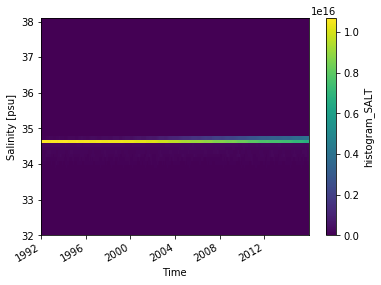

In [24]:
# most of WG's water is ~34.6 psu
# very little variability in temp distribution
salt_dist.plot(x='time')

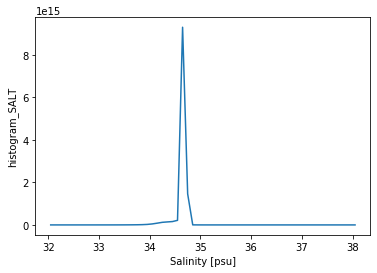

In [25]:
# most of the WG's water is avg salinity (btwn 34, 35 psu)
salt_dist.mean(dim='time').plot()

Text(0.5, 1.0, 'salt dist anomaly')

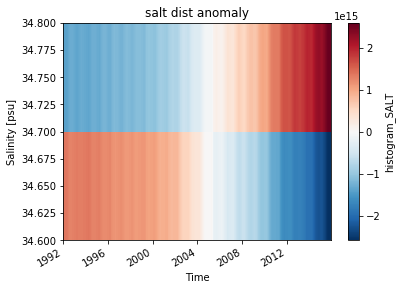

In [28]:
# salt distribution anomaly
(salt_dist - salt_dist.mean(dim='time')).plot(x='time')
plt.ylim([34.6, 34.8])
plt.title('salt dist anomaly')

# $\frac{\partial \mathcal{V}}{\partial t}$

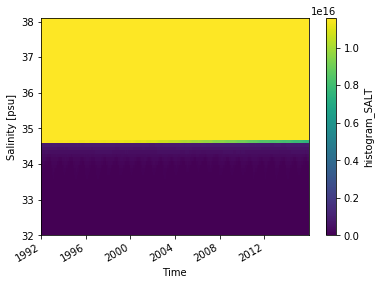

In [29]:
# cumulative volume
V = salt_dist.cumsum(dim='SALT_bin')
V.transpose().plot()

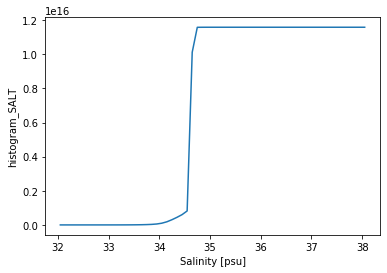

In [30]:
#time avg of cumulative volume
V_mean = V.mean(dim='time')
V_mean.plot()

(34.6, 34.7)

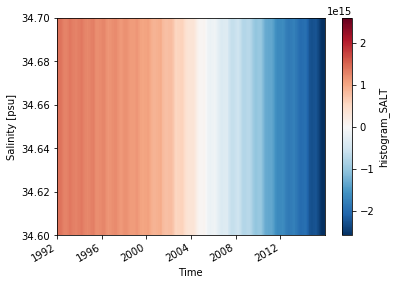

In [34]:
#cumulative volume anomaly
V_anom = V - V_mean
V_anom.plot(x='time')
plt.ylim(34.6, 34.7)

(33, 35)

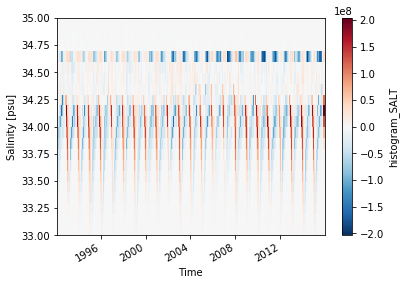

In [44]:
dt = 5*24*60*60
#using V_anom bc there is no change in V_mean
dVdt = V_anom.diff(dim='time') / dt
dVdt.plot(x='time', vmax=204e6)
plt.ylim(33, 35)

# $\Psi$

$$
-\int_{\delta R}  (\mathbf{u} \cdot  \hat{\mathbf{n}} ) \mathcal{H}(\tilde S - S)\ dA
$$

$$
= -\int_{\tilde S_{min}}^{\tilde S_{max}} d\tilde S \int_{\delta R}  (\mathbf{u} \cdot  \hat{\mathbf{n}} ) \delta(\tilde S - S)\ dA
$$

In [46]:
#this is the "dA" part of the equation
u_transport = ds.UVELMASS * (coords.dyG * coords.drF * coords.hFacW) #m^3/s
v_transport = ds.VVELMASS * (coords.dxG * coords.drF * coords.hFacS) #m^3/s
u_transport

<xarray.DataArray (time: 288, k: 50, j: 270, i_g: 360)>
dask.array<mul, shape=(288, 50, 270, 360), dtype=float32, chunksize=(1, 50, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Dimensions without coordinates: j, i_g

In [47]:
#this is the product of vel components and normal vector part of the equation
u_transport_weddell = u_transport.isel(**lat_range, i_g=right_lon)
v_transport_weddell = v_transport.isel(**lon_range, j_g=upper_lat)

In [48]:
u_transport_mean_value = u_transport_weddell.mean(dim='time').sum().values
u_transport_mean_value

array(-20298532., dtype=float32)

In [49]:
v_transport_mean_value = v_transport_weddell.mean(dim='time').sum().values
v_transport_mean_value

array(15231582., dtype=float32)

In [50]:
#residual potentially due to E-R-P
residual = u_transport_mean_value + v_transport_mean_value
residual #~5.067Sv reasonable amount due to evap?

-5066950.0

In [51]:
import xgcm
grid = xgcm.Grid(ds, coords={'X': {'center': 'i', 'left': 'i_g'}, 
                             'Y': {'center': 'j', 'left': 'j_g'},
                             'T': {'center': 'time'},
                             'Z': {'center': 'k', 'left': 'k_l', 'outer': 'k_p1', 'right': 'k_u'}},
                             periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic):
  * center   j --> left
  * left     j_g --> center
T Axis (not periodic):
  * center   time
Z Axis (not periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center

In [52]:
#interpolating salt to be on same grid pt as velocity components
salt_at_u = grid.interp(ds.SALT, 'X')
salt_at_v = grid.interp(ds.SALT, 'Y', boundary='extend')

In [54]:
salt_uvel = salt_at_u.isel(**lat_range, i_g=right_lon)
salt_vvel = salt_at_v.isel(**lon_range, j_g=upper_lat)

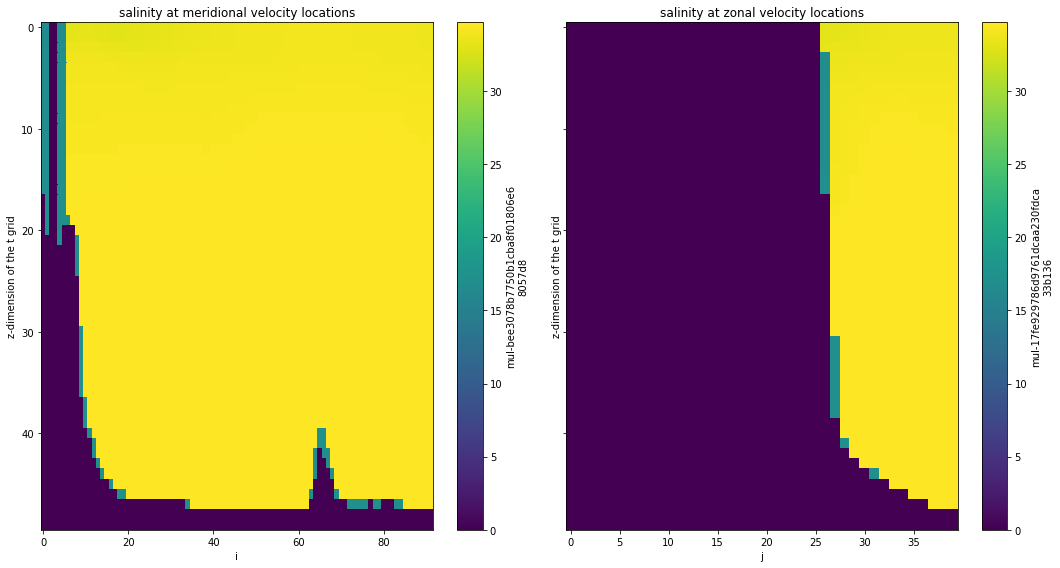

In [56]:
#plt.figure(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True)

salt_vvel[0].plot(ax=ax1, yincrease=False)
#temperature values at vvel values in WG region in timestep:0
ax1.title.set_text('salinity at meridional velocity locations')

salt_uvel[0].plot(ax=ax2, yincrease=False)
#temperature values at uvel values in WG region in timestep:0
ax2.title.set_text('salinity at zonal velocity locations')

plt.tight_layout();

In [58]:
uvel = ds.UVELMASS.isel(**lat_range, i_g=right_lon)
vvel = ds.VVELMASS.isel(**lon_range, j_g=upper_lat)

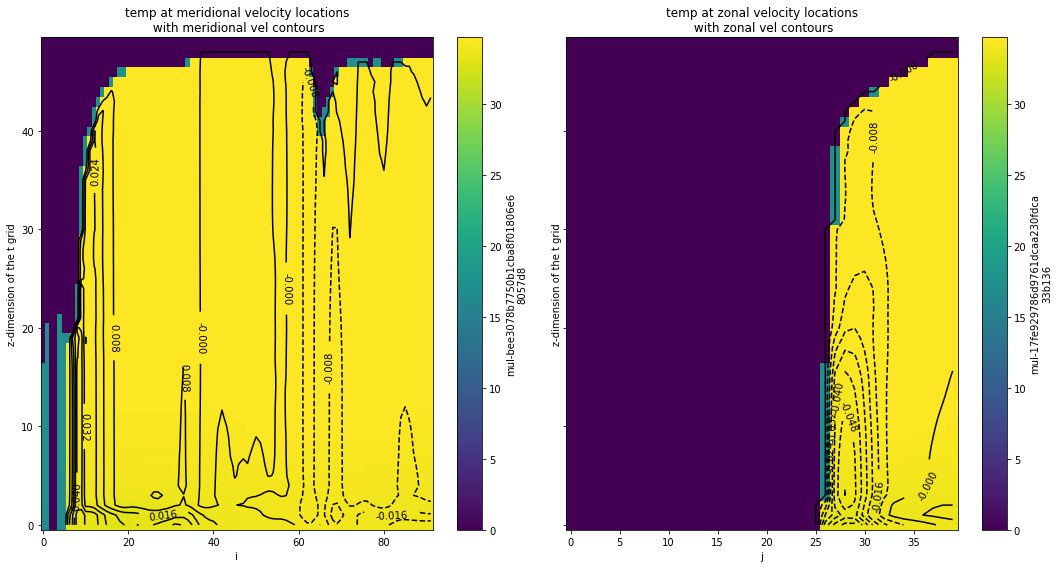

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True)

salt_vvel[0].plot(ax=ax1)
cs1 = vvel[0].plot.contour(ax=ax1, colors='k', levels=np.arange(-0.08, 0.08, 0.008))
plt.clabel(cs1)
ax1.title.set_text('temp at meridional velocity locations\n with meridional vel contours')

salt_uvel[0].plot(ax=ax2)
cs2 = uvel[0].plot.contour(ax=ax2, colors='k', levels=np.arange(-0.08, 0.08, 0.008))
plt.clabel(cs2)
ax2.title.set_text('temp at zonal velocity locations\n with zonal vel contours')

plt.tight_layout();

In [62]:
#this is the delta function part of the equation above
u_binned = histogram(salt_uvel.rename('salt'), bins=[salt_bins],
                     weights=u_transport_weddell, dim=['k', 'j']).load()
v_binned = histogram(salt_vvel.rename('salt'), bins=[salt_bins],
                     weights=v_transport_weddell, dim=['k', 'i']).load()

In [63]:
u_binned

<xarray.DataArray 'histogram_salt' (time: 288, salt_bin: 61)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * salt_bin  (salt_bin) float64 32.05 32.15 32.25 32.35 ... 37.85 37.95 38.05

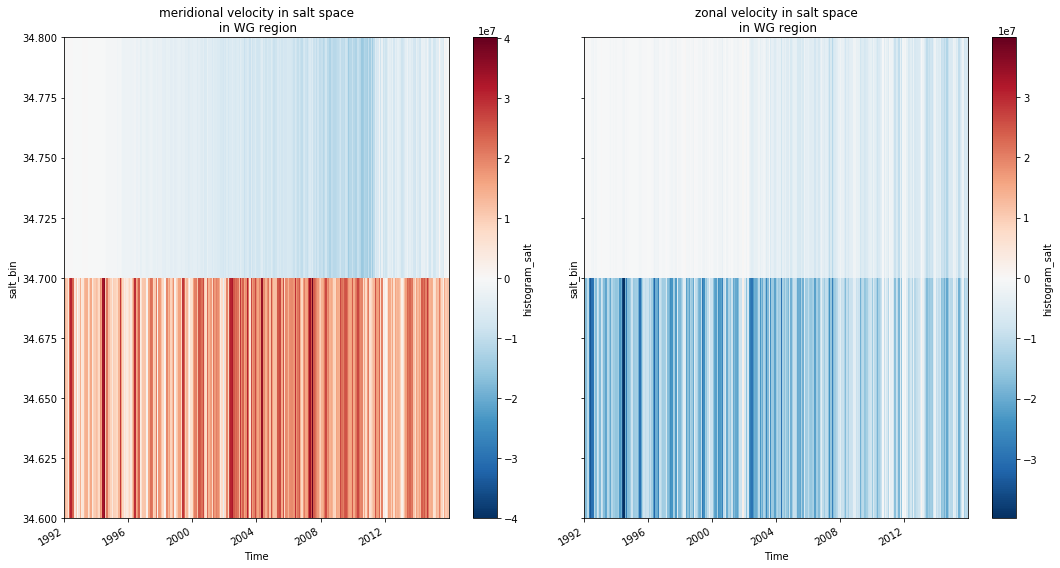

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True)

v_binned.transpose().plot(ax=ax1, ylim=(34.6, 34.8))
ax1.title.set_text('meridional velocity in salt space\n in WG region')

u_binned.transpose().plot(ax=ax2, ylim=(34.6, 34.8))
ax2.title.set_text('zonal velocity in salt space\n in WG region')

plt.tight_layout();

In [67]:
transport_binned = u_binned + v_binned
transport_binned.load()

<xarray.DataArray 'histogram_salt' (time: 288, salt_bin: 61)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * salt_bin  (salt_bin) float64 32.05 32.15 32.25 32.35 ... 37.85 37.95 38.05

In [68]:
transport_binned.max()

<xarray.DataArray 'histogram_salt' ()>
array(13113479.39024448)

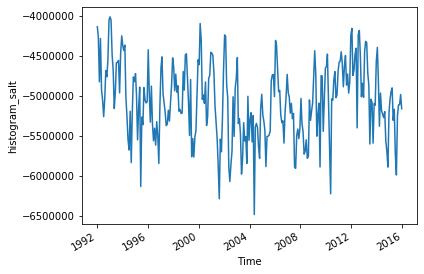

In [69]:
transport_binned.sum(dim='salt_bin').plot()

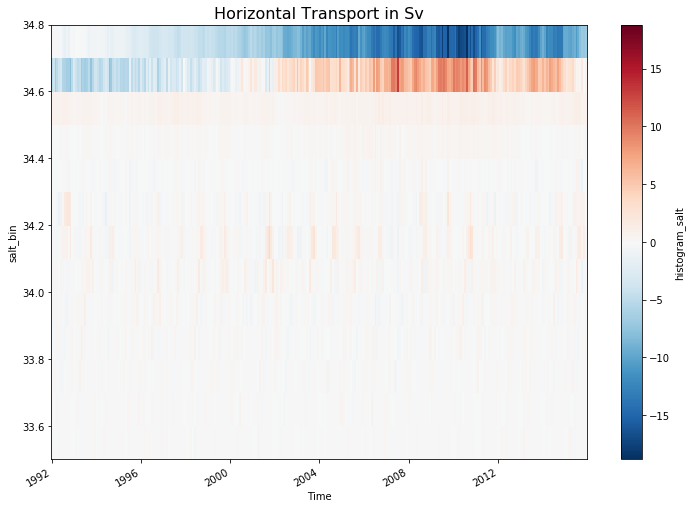

In [71]:
(transport_binned/1e6).transpose().plot(figsize=(12,8))
plt.title('Horizontal Transport in Sv', fontsize=16)
plt.ylim(33.5,34.8);

In [72]:
#this is the salt integral part of the equation
transport_weddell = - transport_binned.cumsum(dim='salt_bin')
transport_weddell

<xarray.DataArray 'histogram_salt' (time: 288, salt_bin: 61)>
array([[     -0.        ,      -0.        ,      -0.        , ...,
        4135106.97118145, 4135106.97118145, 4135106.97118145],
       [     -0.        ,      -0.        ,      -0.        , ...,
        4263881.47117329, 4263881.47117329, 4263881.47117329],
       [     -0.        ,      -0.        ,      -0.        , ...,
        4823072.15666962, 4823072.15666962, 4823072.15666962],
       ...,
       [     -0.        ,      -0.        ,      -0.        , ...,
        5110061.94294155, 5110061.94294155, 5110061.94294155],
       [     -0.        ,      -0.        ,      -0.        , ...,
        4981053.70744181, 4981053.70744181, 4981053.70744181],
       [     -0.        ,      -0.        ,      -0.        , ...,
        5160184.20014524, 5160184.20014524, 5160184.20014524]])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * salt_bin  (salt_bin) float64 32.05 32.15 32.25 32.35 ... 37.85 37.95 38.05

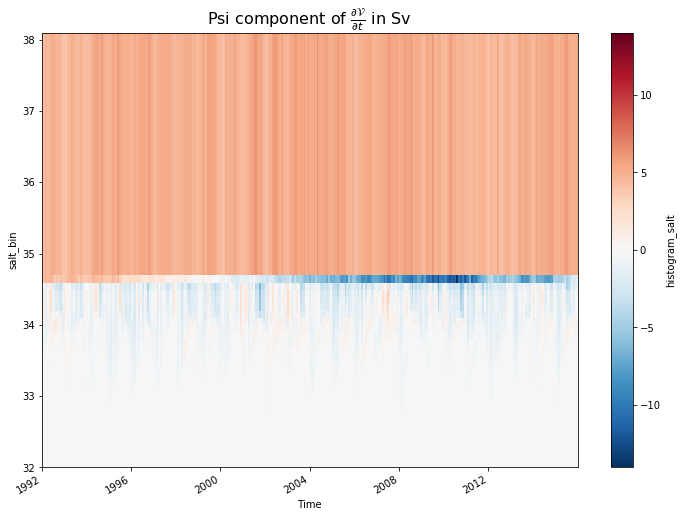

In [76]:
(transport_weddell/1e6).transpose().plot(figsize=(12,8))
plt.title(r'Psi component of $\frac{\partial\mathcal{V}}{\partial t}$ in Sv', fontsize=16);

# $\Omega$

$$
-\int_R \delta(\tilde S - S) \dot S dV
$$

In [77]:
ds_slt = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/ECCO/budget_slt.zarr'))

ds_slt_wg = ds_slt.isel(**lat_range, **lon_range)
ds_slt_wg

<xarray.Dataset>
Dimensions:                   (i: 92, j: 40, k: 50, time: 288, time_snp: 287)
Coordinates:
  * k                         (k) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
  * time                      (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * time_snp                  (time_snp) datetime64[ns] 1992-02-01 ... 2015-12-01
Dimensions without coordinates: i, j
Data variables:
    conv_horiz_adv_flux_SLT   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 40, 92), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, k, j, i) float32 dask.array<chunksize=(1, 50, 40, 92), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, k, j, i) float32 dask.array<chunksize=(1, 50, 40, 92), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 40, 92), meta=np.ndarray>
    salt                      (time, k, j, i) float32 dask.array<chunksize=(1, 50, 40, 92), meta=np.ndarray>
    salt_plume                (time, k, j, i) float32 dask.array<chunksize=(1, 50, 40, 92), meta=np.ndarray>
    salt_snp                  (time_snp, k, j, i) float32 dask.array<chunksize=(1, 50, 40, 92), meta=np.ndarray>
    surface_flux_SLT          (k, time, j, i) float32 dask.array<chunksize=(50, 1, 40, 92), meta=np.ndarray>
    total_tendency_SLT_truth  (time, k, j, i) float64 dask.array<chunksize=(1, 50, 40, 92), meta=np.ndarray>

### Adv & Diff terms

In [80]:
def histogram_func(variable):
    """Generalized xhistogram's histogram function 
    for adv and diff flux terms"""
    hist = histogram(ds_slt_wg.salt.rename('salt'), bins=[salt_bins],
              weights=variable, dim=['i', 'j', 'k'])
    return hist

In [91]:
#this is the delta function part of the equation
fluxes = [ds_slt_wg.conv_horiz_diff_flux_SLT,
          ds_slt_wg.conv_vert_adv_flux_SLT,
          ds_slt_wg.conv_vert_diff_flux_SLT,
          ds_slt_wg.salt_plume]

fluxes_binned = histogram_func(ds_slt_wg.conv_horiz_adv_flux_SLT).to_dataset(name='conv_horiz_adv_flux_SLT')

for var in fluxes:
    new_vars = histogram_func(var).rename(var.name)
    fluxes_binned = xr.merge([fluxes_binned, new_vars], compat='override')

In [92]:
fluxes_binned.load()

<xarray.Dataset>
Dimensions:                   (salt_bin: 61, time: 288)
Coordinates:
  * time                      (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * salt_bin                  (salt_bin) float64 32.05 32.15 ... 37.95 38.05
Data variables:
    conv_horiz_adv_flux_SLT   (time, salt_bin) float64 0.0 0.0 0.0 ... 0.0 0.0
    conv_horiz_diff_flux_SLT  (time, salt_bin) float64 0.0 0.0 0.0 ... 0.0 0.0
    conv_vert_adv_flux_SLT    (time, salt_bin) float64 0.0 0.0 0.0 ... 0.0 0.0
    conv_vert_diff_flux_SLT   (time, salt_bin) float64 0.0 0.0 0.0 ... 0.0 0.0
    salt_plume                (time, salt_bin) float64 0.0 0.0 0.0 ... 0.0 0.0

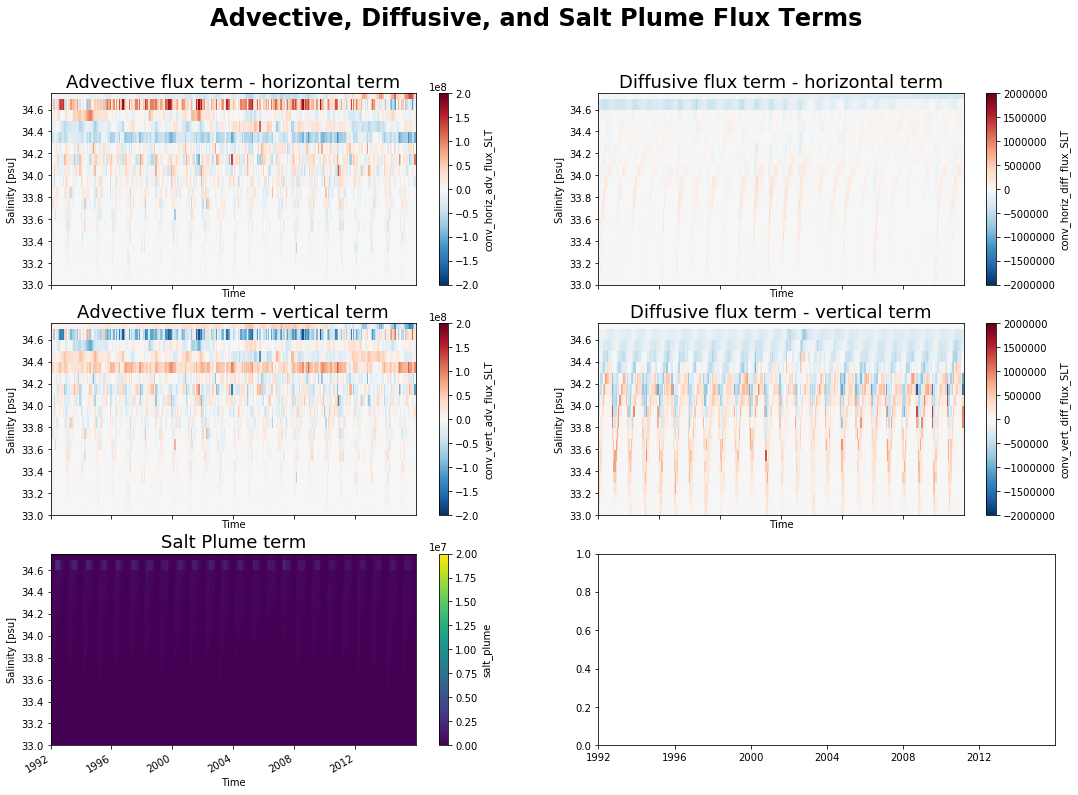

In [95]:
fig, axes = plt.subplots(3, 2, figsize=(18,12), sharex=True)

fluxes_binned.conv_horiz_adv_flux_SLT.transpose().plot(ax=axes[0,0], vmax=200e6)
axes[0,0].set_title('Advective flux term - horizontal term', fontsize=18)
axes[0,0].set_ylim(33, 34.75)

fluxes_binned.conv_horiz_diff_flux_SLT.transpose().plot(ax=axes[0,1], vmax=2e6)
axes[0,1].set_title('Diffusive flux term - horizontal term', fontsize=18)
axes[0,1].set_ylim(33, 34.75)

fluxes_binned.conv_vert_adv_flux_SLT.transpose().plot(ax=axes[1,0], vmax=200e6)
axes[1,0].set_title('Advective flux term - vertical term', fontsize=18)
axes[1,0].set_ylim(33, 34.75)

fluxes_binned.conv_vert_diff_flux_SLT.transpose().plot(ax=axes[1,1], vmax=2e6)
axes[1,1].set_title('Diffusive flux term - vertical term', fontsize=18)
axes[1,1].set_ylim(33, 34.75)

fluxes_binned.salt_plume.transpose().plot(ax=axes[2,0], vmax=20e6)
axes[2,0].set_title('Salt Plume term', fontsize=18)
axes[2,0].set_ylim(33, 34.75)

plt.suptitle('Advective, Diffusive, and Salt Plume Flux Terms', weight='bold', fontsize=24);

### Surface terms

In [87]:
#delta part of the equation
surf_binned = histogram(ds_slt_wg.salt.isel(k=0).rename('salt'), bins=[salt_bins],
                        weights=ds_slt_wg.surface_flux_SLT, dim=['i', 'j', 'k']).load()

(33.4, 34.75)

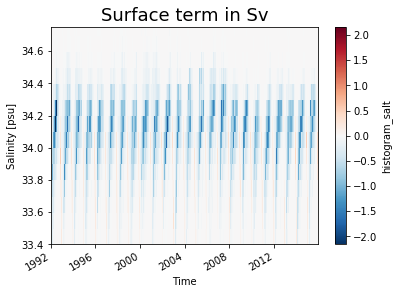

In [90]:
(surf_binned/1e6).transpose().plot()
plt.title('Surface term in Sv', fontsize=18)
plt.ylim(33.4, 34.75)

In [97]:
omega = - (fluxes_binned.conv_horiz_diff_flux_SLT + 
           fluxes_binned.conv_vert_diff_flux_SLT +
           fluxes_binned.salt_plume +
           surf_binned)
omega

<xarray.DataArray (time: 288, salt_bin: 61)>
array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * salt_bin  (salt_bin) float64 32.05 32.15 32.25 32.35 ... 37.85 37.95 38.05

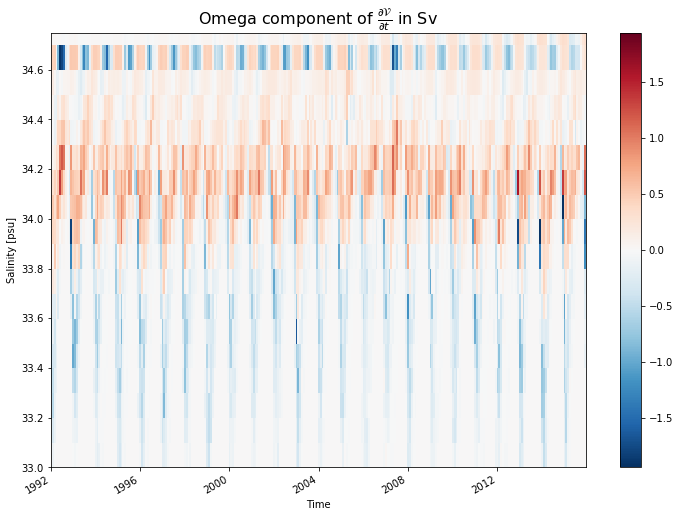

In [98]:
(omega/1e6).transpose().plot(figsize=(12,8))
plt.ylim(33, 34.75)
plt.title(r'Omega component of $\frac{\partial\mathcal{V}}{\partial t}$ in Sv', fontsize=16);

### $\Psi + \Omega$

In [99]:
tendency_term = (transport_weddell + omega)
tendency_term

<xarray.DataArray (time: 288, salt_bin: 61)>
array([[     -0.        ,      -0.        ,      -0.        , ...,
        4135106.97118145, 4135106.97118145, 4135106.97118145],
       [     -0.        ,      -0.        ,      -0.        , ...,
        4263881.47117329, 4263881.47117329, 4263881.47117329],
       [     -0.        ,      -0.        ,      -0.        , ...,
        4823072.15666962, 4823072.15666962, 4823072.15666962],
       ...,
       [     -0.        ,      -0.        ,      -0.        , ...,
        5110061.94294155, 5110061.94294155, 5110061.94294155],
       [     -0.        ,      -0.        ,      -0.        , ...,
        4981053.70744181, 4981053.70744181, 4981053.70744181],
       [     -0.        ,      -0.        ,      -0.        , ...,
        5160184.20014524, 5160184.20014524, 5160184.20014524]])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * salt_bin  (salt_bin) float64 32.05 32.15 32.25 32.35 ... 37.85 37.95 38.05

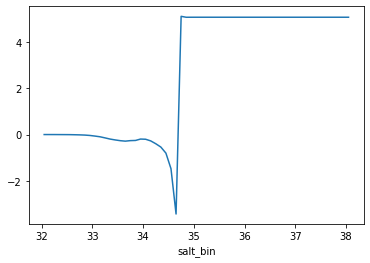

In [100]:
#time_avg to get right of lhs
tendency_term_mean = tendency_term.mean(dim='time')
(tendency_term_mean/1e6).plot()

### $\frac{\int \frac{\partial \mathcal{V}}{\partial t}\ dt}{t - t_0}$

In [101]:
dVdt_time_mean = dVdt.mean(dim='time')
dVdt_time_mean

<xarray.DataArray 'histogram_SALT' (SALT_bin: 61)>
array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.11256598e-13, -8.11256598e-13,  2.43376979e-12,  0.00000000e+00,
       -2.43376979e-12, -6.49005278e-12, -9.12663673e-12, -2.97634979e+03,
       -1.26025887e+04, -3.94408674e+04, -8.81160999e+04, -1.60856405e+05,
       -2.58722876e+05, -3.67093389e+05, -4.74056126e+05, -5.64446023e+05,
       -5.83757283e+05, -3.60172006e+05, -8.23047619e+04,  1.28500540e+05,
        2.36237867e+05, -2.70116847e+04, -3.19318587e+07, -3.04221224e-12,
       -3.66604712e+03, -2.53517687e-13, -5.07035374e-14,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])
Coordinates:
  * SALT_bin  (SALT_bin) float64 32.05 32.15 32.25 32.35 ... 37.85 37.95 38.05

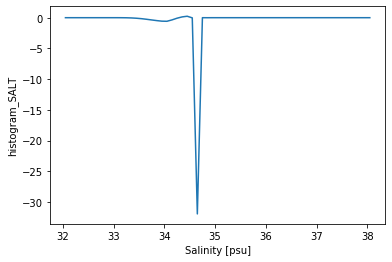

In [102]:
(dVdt_time_mean/1e6).plot()

### $\frac{\int \frac{\partial \mathcal{V}}{\partial t}\ dt}{t - t_0} = \bar{\Psi} + \bar{\Omega}$

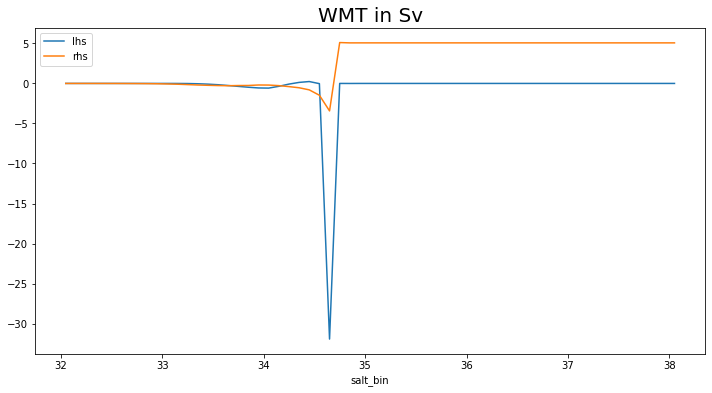

In [103]:
plt.figure(figsize=(12,6))
(dVdt_time_mean/1e6).plot(label='lhs')
(tendency_term_mean/1e6).plot(label='rhs')
plt.legend()
plt.title('WMT in Sv', fontsize=20);